1. 타이타닉의 생존율을 예측
    - 문제를 정의(Defining the problem statement)
    - 데이터를 수집(Collecting the data)
    - 데이터 탐색(Exploratory data analysis)
    - 피처 엔지니어링(Feature engineering)
    - 모델링(Modeling)
    - 평가(Testing)

(1) 문제정의
    - 어떤 승객이 생존할 수 있었는지
    - (특정 데이터가 있을 때) 생존 유무를 예측

(2) 데이터를 수집하라
    - kaggle 사이트 가입
    - Titanic data를 찾아서 download(train.csv, test.csv)
    - 작업 폴더에 복사
    - 파일명 변경 train.csv-> titanic_train.csv,test.csv-> titanic_test.csv

(3) 데이터 불러오기
    - pandas 사용
    - titanic_train.csv 읽어오기 
    - test= titanic_test.csv 읽어오기

*  데이터 수집 및 확인
    - pd.read_csv()
    - df.shape
    - df.column
    - df.head() / df.tail()
    - df. info()
    - df.isnull(). sum()

In [1]:
import pandas as pd

test = pd.read_csv('c:/chosungeun/data/titanic_test.csv')

train = pd.read_csv('c:/chosungeun/data/titanic_train.csv')


In [2]:
test.head(3) # 필수

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
train.head(3) # 필수

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
test.shape

(418, 11)

In [5]:
train.shape

(891, 12)

In [6]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

1. Data Dictionary
    - passengerid
    - Survived: 0=No, 1=Yes 0. 생존하지 못함 1.생존
    - pclass:Ticket class 1= 1st, 2=2nd, 3=3rd 승객 등급
    - Name, Sex, Age
    - sibsp: # of siblings / spouses aboard the Titanic  함께 탑승한 형제, 배우자의 수
    - parch : # of parents / children aboard the Titanic 함께 탑승한 자녀, 부모의 수
    - ticket: Ticket number 티켓 id
    - Fare : 요금
    - cabin : Cabin number 객실 번호
    - embarked: Port of Embarkation C = Cherbourg, Q= Queenstown, S= Southampton 탑승한 곳
        

In [7]:
# 컬럼 데이터 유형 확인 ( 필수)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# age는 결측치(714/ 891)가 있다.
# Cabin도 결측치(204 / 891)
# Embarked 결측치( 889/ 891)


In [9]:
# null값 확인
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 시각화를 통한 데이터 분석
    - matplotlib, seaborn(version 출력)
    - %matplotlib inlin


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


* Categorical Features 찾아서 그래프 그리기
    - 성별/ 생존유무의 인원수를 막대 그래프
    - 생존 데이터 만들기 ( 남 인원 / 여 인원 )
    - 사망 데이터 만들기 ( 남 인원 / 여 인원 )
    - df.plot 사용해서 막대그래프를 그리기
    

In [11]:
survived = train [train['Survived'] == 1]['Sex'].value_counts()
survived

female    233
male      109
Name: Sex, dtype: int64

In [12]:
dead = train [train['Survived']==0]['Sex'].value_counts(); dead

male      468
female     81
Name: Sex, dtype: int64

In [13]:
df = pd.DataFrame([survived, dead]) ; df

,female,male
Sex,233,109
Sex,81,468


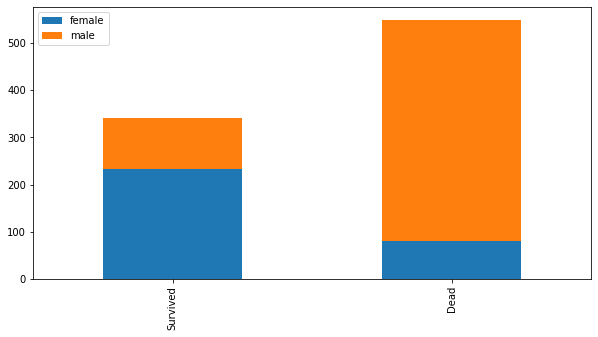

In [14]:
df. index = ['Survived', 'Dead']

df.plot(kind='bar', stacked=True, figsize=(10,5))

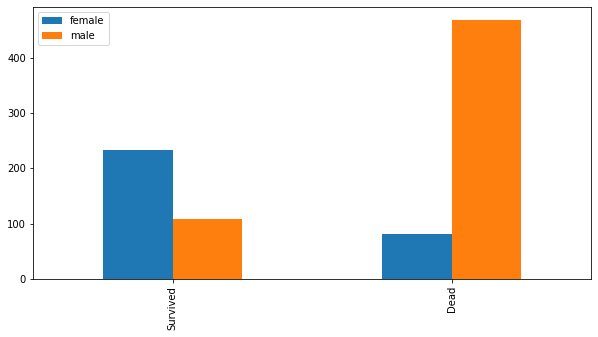

In [15]:
df.plot(kind='bar', stacked=False, figsize=(10,5))

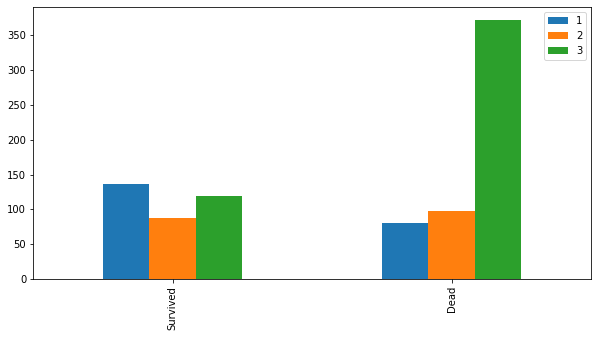

In [16]:
survived = train [train['Survived'] == 1]['Pclass'].value_counts()
dead = train [train['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([survived, dead])
df. index = ['Survived', 'Dead']
df.plot(kind='bar', stacked=False, figsize=(10,5))

# bar_chart 함수를 만들어서 
# 변수를 'Sex', 'Pclass', 'Sibsp',....입력받아 그래프 그리기

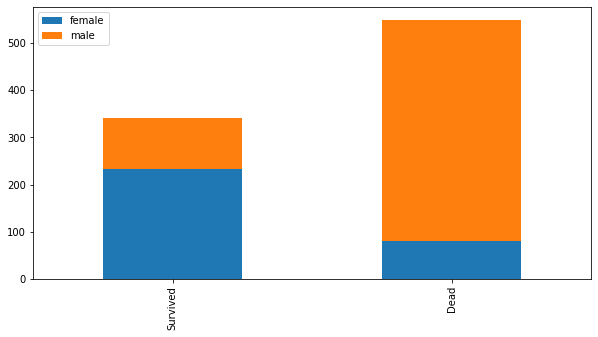

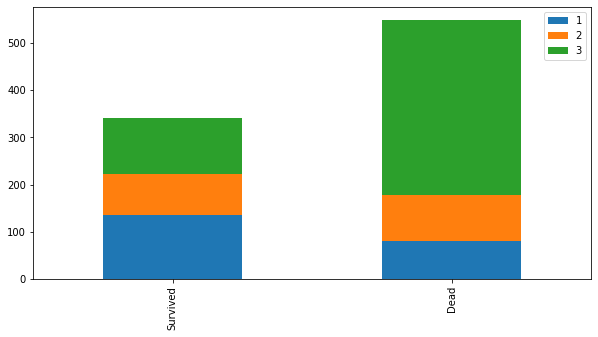

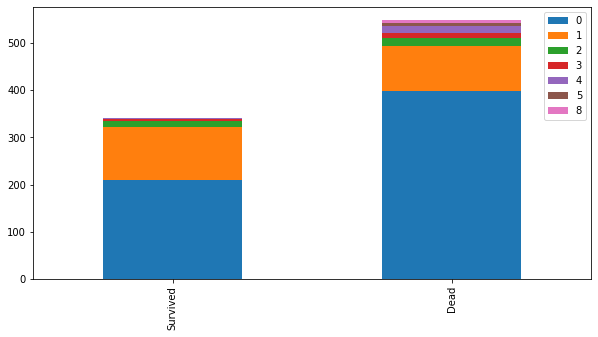

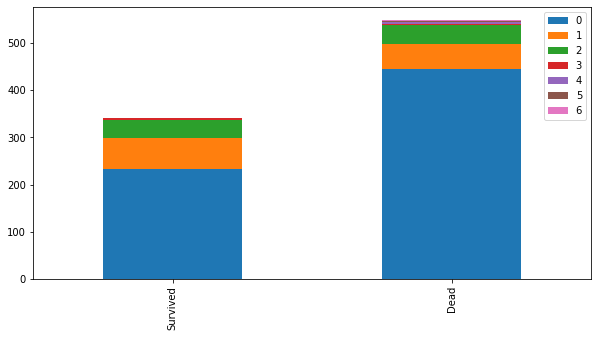

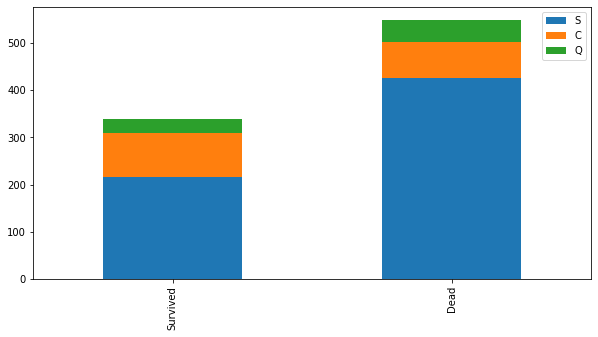

In [17]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    
bar_chart('Sex') # 차트는 여성이 남성보다 생존할 가능성이 더 높다는 것을 확인시켜 준다
bar_chart('Pclass') # 차트는 1등급 클래스가 다른 클래스보다 생존할 가능성이 더 높다는 것을 확인시켜 준다
# 차트는 3등급 클래스가 다른 클래스보다 죽을 가능성이 더 높다는 것을 확인시켜 준다
bar_chart('SibSp')
bar_chart('Parch')
bar_chart('Embarked')

# 피처 엔지니어링 (Feature engineering) 
- 의미 있는 데이터로 변환
- 데이터에 대한 도메인 지식을 사용하여 기계 학습 알고리즘을 작동시키는 Feature(Feature vectors)를 만드는 과정이다.

# Name 컬럼 변경하기
    - Name 값 중 '.' 이전의 문자열을 추출하면 구분이 될까? Mr, Mrs. Miss

In [18]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [19]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Capt          1
Lady          1
Mme           1
Don           1
Countess      1
Ms            1
Sir           1
Name: Title, dtype: int64

* 실습 ) Title 컬럼의 데이터를
    - 'Mr'=0, 'Miss'=1, 'Mrs'=2
    - 'Master', 'Dr', 'Rev', 'Col', 'Major', 'Mlle', 'Countess' = 3
    - 'Ms', 'Lady', 'Jonkheer', 'Don', 'Mme', 'Capt', 'Sir'=3

In [20]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand=False)

    title_mapping = {'Mr':0, 'Miss':1, 'Mrs':2, 'Master':3, 
                 'Dr':3, 'Rev': 3, 'Col' :3, 'Major':3, 'Mlle': 3,
                 'Countess':3, 'Ms':3, 'Lady':3, 'Jonkheer':3, 'Don':3, 'Mme': 3,
                'Capt':3, 'Sir':3}
    
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [21]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [22]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2.0


In [23]:
train_bk02 = train[:]

test_bk02 = test.copy()

# Title 컬럼별 / 생존유무별 생존자 수 Bar 그래프 그리기


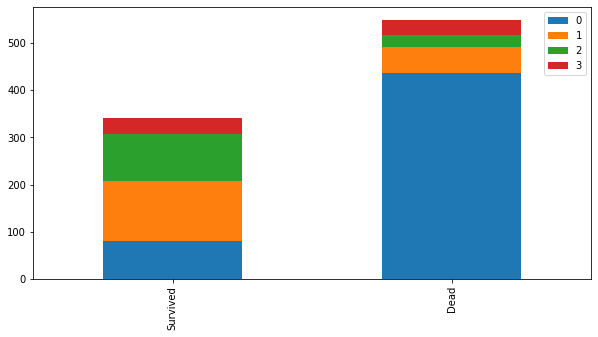

In [24]:
bar_chart('Title')

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
# Name 컬럼 삭제후

test_bk03=train[:]
test_bk03=test.copy()

In [27]:
# 성별 칼럼 변경 male-> 0, female->1 

train.rename(columns={"male":"0","female":"1"}, inplace = True)

In [28]:
sex_mapping = {'male':0, 'female':1}

for dataset in train_test_data:
    
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)


In [29]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C,2


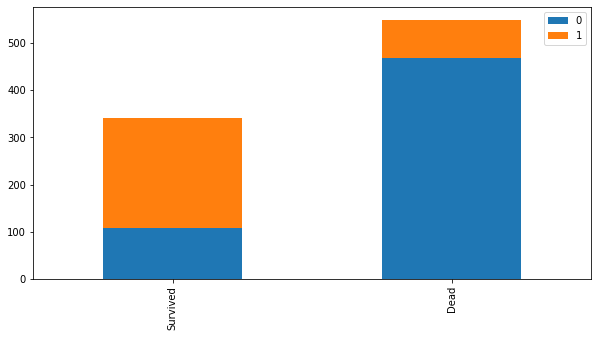

In [30]:
bar_chart('Sex')

In [31]:
# 성별컬럼 변경후

train_bk04 = train[:]
train_bk04 = test.copy()

* Age 컬럼을 명목형 데이터로변환
    - Nan값(결측치)을 채워넣을 것(Title별 중앙값)


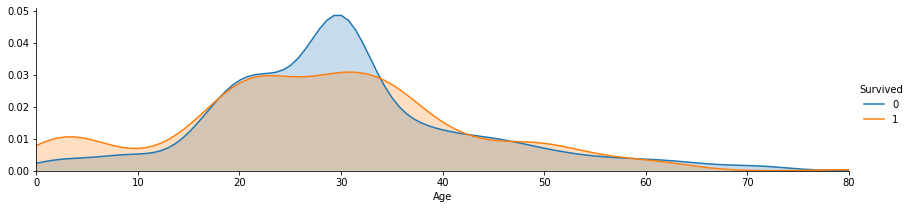

In [32]:
# fill missing age with median age for each title(Ms, Mrs, Miss, Others)

train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)

test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace=True)

facet= sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()


plt.show()

# sns.FacetGrid

# sns.kdeplot


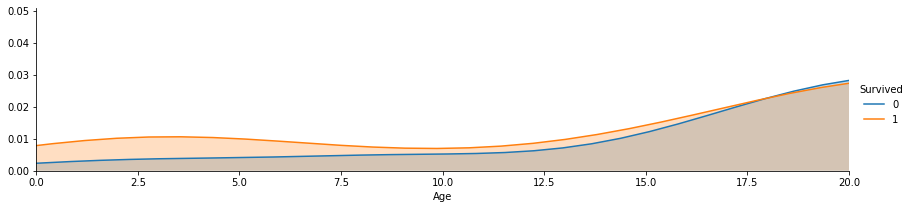

In [33]:
facet= sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

plt.show()


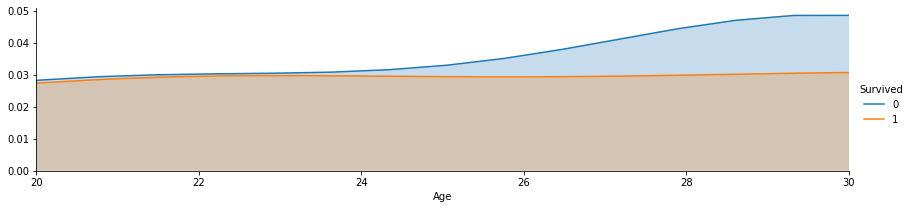

In [34]:
facet= sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Age', shade=True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

plt.show()


In [35]:
# age가 16세 이하면 0
#       16세보다 크고 26세보다 작으면 =1
#       26세보다 크고 36세보다 작으면 =2
#       36세보다 크고 62세보다 작으면 =3
#       62세보다 크면 = 4


In [36]:
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <=16, 'Age']=0,
    dataset.loc[(dataset['Age'] >16) & (dataset['Age']<=26),'Age']=1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36), 'Age']=2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62), 'Age']=3
    dataset.loc[dataset['Age']>62,'Age']=4
    

In [37]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",0,2.0,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",0,3.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,0.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,2.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,0.0,1,0,237736,30.0708,NaN,C,2


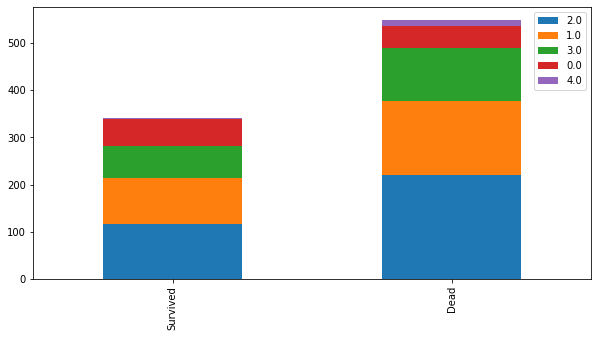

In [38]:
bar_chart('Age')

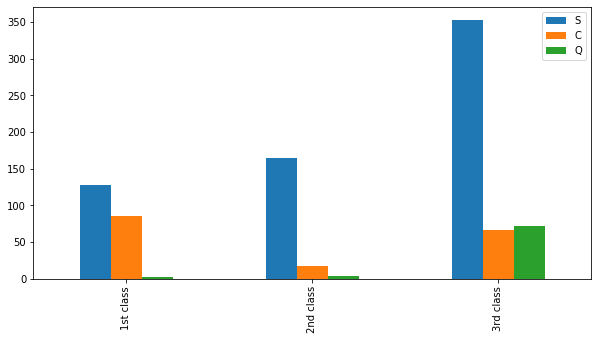

In [39]:
# 도시별로 부유한 사람과 가난한 사람의 비율의 차이가 있지 않을까?

Pclass1= train[train['Pclass']==1]['Embarked'].value_counts() # 'Pclass=1에서 'Embarked'칼럼만 빼내서 value.counts
Pclass2= train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3= train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index=['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=False, figsize=(10,5))

* Embarked 정제하기
    - train에서 Embarked 결측치 데이터 수는 몇 개?
    - train_test_data에서 결측치 'S'로 변경
    - "S"->0, "C":1, "Q":2

In [40]:
train['Embarked'].isnull().sum()

2

In [41]:
train_test_data = [train, test]
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [42]:
train['Embarked'].isnull().sum()

0

In [43]:
Embarked_mapping = {'S':0, 'C':1, 'Q':2}

for dataset in train_test_data:
   dataset['Embarked'] = dataset['Embarked'].map(Embarked_mapping)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0


 * Fare 결측치 확인( train, test) 
    - 결측치는 Pclass별 요금별, median 값으로 변경
 * Fare별 Survived별 kdeplot를 그리기 
 *  <=17 : 0, 17-30:1, 30-100:2, 

In [45]:
test['Fare'].isnull().sum()

1

In [46]:
test['Fare'].fillna(test.groupby('Pclass')['Fare'].transform('median'), inplace=True)

In [47]:
test['Fare'].isnull().sum()

0

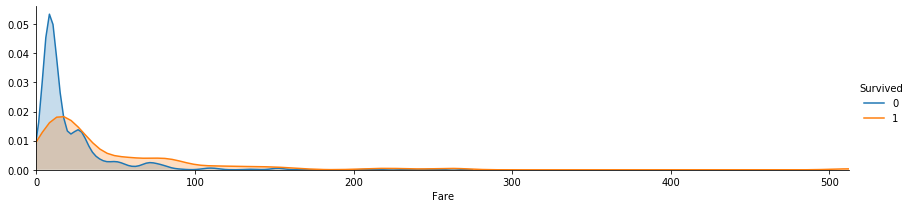

In [48]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

In [49]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3,

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,NaN,0,0


* Cabin 전처리
    - Cabin 데이터 유형 확인
    - Cabin에서 앞에 1자리만 추출해서 변경하기
    - Pclass별 Cabin 분포 확인(value_counts)후 Bar 그래프    
    - A(0), B(0.4), C(0.8), D(1.2), E(1.6), F(2), G(2.4), T(2.8)
    - 결측치는 Pclass별 Cabin 중앙값으로 대체

In [51]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
C22 C26        3
F2             3
              ..
B73            1
A16            1
C104           1
A36            1
A26            1
Name: Cabin, Length: 147, dtype: int64

In [52]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]


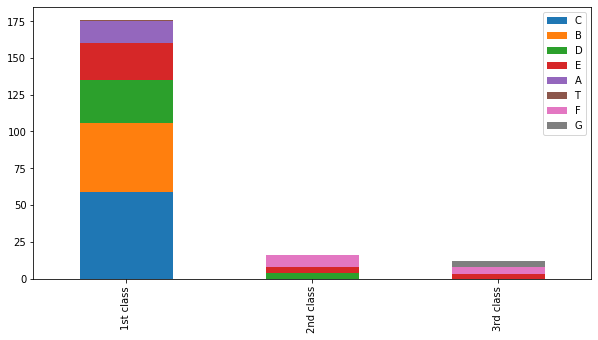

In [53]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [54]:
for dataset in train_test_data:
    
    cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 
                 'E':1.6, 'F': 2, 'G' :2.4, 'T':2.8}
    
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)



In [55]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace=True)

In [56]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0


*  SibSp, Parch 전처리
    - FamilySize = SibSp + Parch+1
    - kdeplot, FamilySize 그래프 만들기
    - 1(0), 2(0.4), 3(0.8)......... ,11(4) mapping table 만들어서 실행

In [57]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

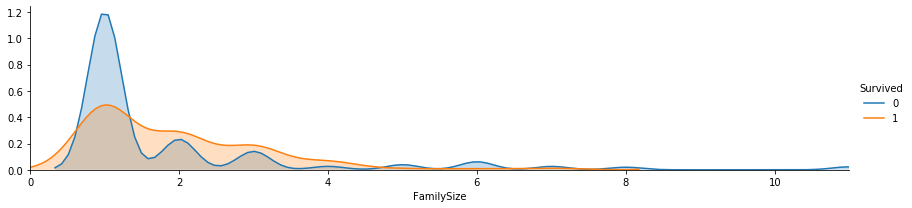

In [58]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [59]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

* Passengerid, Ticket, SibSp, Parch 컬럼 삭제
    - Train, Test


In [60]:
c_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(c_drop, axis=1)
test = test.drop(c_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [61]:
train.drop('Name', axis=1, inplace = True)
test.drop('Name', axis=1, inplace=True)


In [62]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,1,3.0,2.0,0.8,1,2,0.4
2,1,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,1,2.0,2.0,0.8,0,2,0.4
4,0,3,0,2.0,0.0,2.0,0,0,0.0


In [63]:
# 완료 후 excel로 저장하기

train.to_excel('c:/chosungeun/data/titanic_train_EDA.xlsx')
test.to_excel('c:/chosungeun/data/titanic_train_EDA.xlsx')